In [1]:
!pip install pennylane qiskit qiskit_aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 8.1 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl 

Resultados de la medición para el estado inicial |0>: {'1': 495, '0': 529}
Resultados de la medición para el estado inicial |1>: {'0': 515, '1': 509}


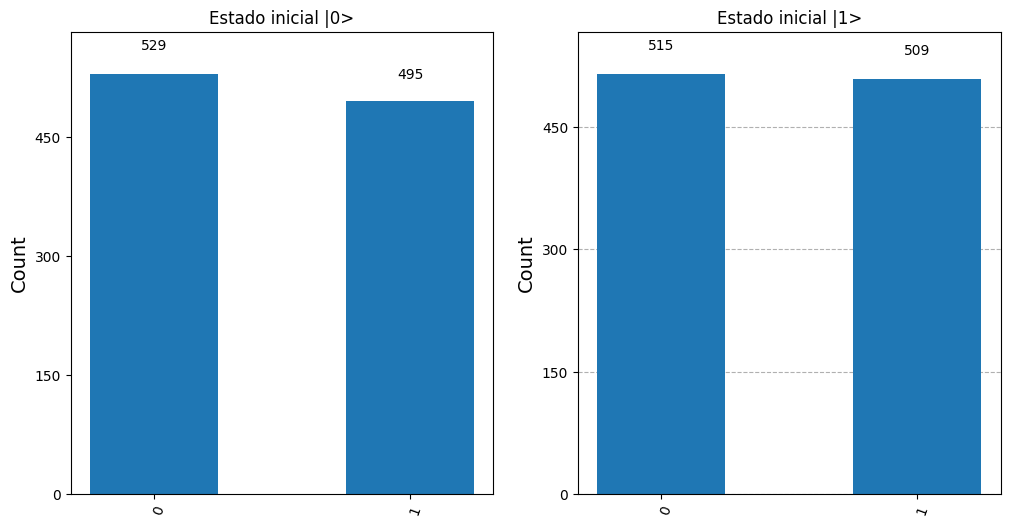

In [7]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

qc0 = QuantumCircuit(1, 1)
qc0.h(0)
qc0.measure(0, 0)

qc1 = QuantumCircuit(1, 1)
qc1.x(0)
qc1.h(0)
qc1.measure(0, 0)

simulator = AerSimulator()

compiled_qc0 = transpile(qc0, simulator)
compiled_qc1 = transpile(qc1, simulator)

result0 = simulator.run(compiled_qc0, shots=1024).result()
result1 = simulator.run(compiled_qc1, shots=1024).result()

counts0 = result0.get_counts(compiled_qc0)
counts1 = result1.get_counts(compiled_qc1)

print(f"Resultados de la medición para el estado inicial |0>: {counts0}")
print(f"Resultados de la medición para el estado inicial |1>: {counts1}")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plot_histogram(counts0, ax=axs[0])
axs[0].set_title('Estado inicial |0>')
plot_histogram(counts1, ax=axs[1])
axs[1].set_title('Estado inicial |1>')
plt.show()

In [12]:
qc = QuantumCircuit(1, 1)

theta = 2 * np.arccos(1/2)
phi = 0
lam = 2 * np.arccos(np.sqrt(3)/2)
qc.u(theta, phi, lam, 0)

qc.h(0)
qc.s(0)

qc.measure(0, 0)

simulator = AerSimulator()

compiled_qc = transpile(qc, simulator)

result = simulator.run(compiled_qc, shots=1024).result()

counts = result.get_counts(compiled_qc)
print(f"Resultados de la medición: {counts}")

plot_histogram(counts)
plt.show()

Resultados de la medición: {'1': 68, '0': 956}
